# Data Processing and EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_zoo = pd.read_csv('./input/zoo.csv')
df_class = pd.read_csv('./input/class.csv')

np.random.seed(17)

In [3]:
df_zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df_zoo.isnull().any().any()

False

In [5]:
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df_zoo.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [7]:
# grabing the classes which I'll use later in graph in nodes
category_animals = [str(x) for x in sorted(df_zoo['class_type'].unique())]

In [8]:
# Creating tuples in list for each category which allow to connect the root with each category
category_animals_edges = [('Animals', x) for x in category_animals]

In [9]:
category_animals_edges

[('Animals', '1'),
 ('Animals', '2'),
 ('Animals', '3'),
 ('Animals', '4'),
 ('Animals', '5'),
 ('Animals', '6'),
 ('Animals', '7')]

In [10]:
# grabing the name of every species
species = [df_zoo['animal_name'][df_zoo['class_type'] == x].tolist() for x in sorted(df_zoo['class_type'].unique())]
# Extracting lists of species for each category to one list
species = [j for i in species for j in i]

In [11]:
# creating tuples for every animal and class which allow to connect the elements in graph
species_edge = []
for animal in species:
    for category in sorted(df_zoo['class_type'].unique()):
    # taking every animal and checking it's class then appending it into list
        if animal in df_zoo['animal_name'][df_zoo['class_type'] ==category].tolist():
            species_edge.append(tuple((str(category),animal)))

In [12]:
# the result of loop above
species_edge[0:5]

[('1', 'aardvark'),
 ('1', 'antelope'),
 ('1', 'bear'),
 ('1', 'boar'),
 ('1', 'buffalo')]

In [13]:
# connecting the edges
edges_of_species=species_edge+category_animals_edges

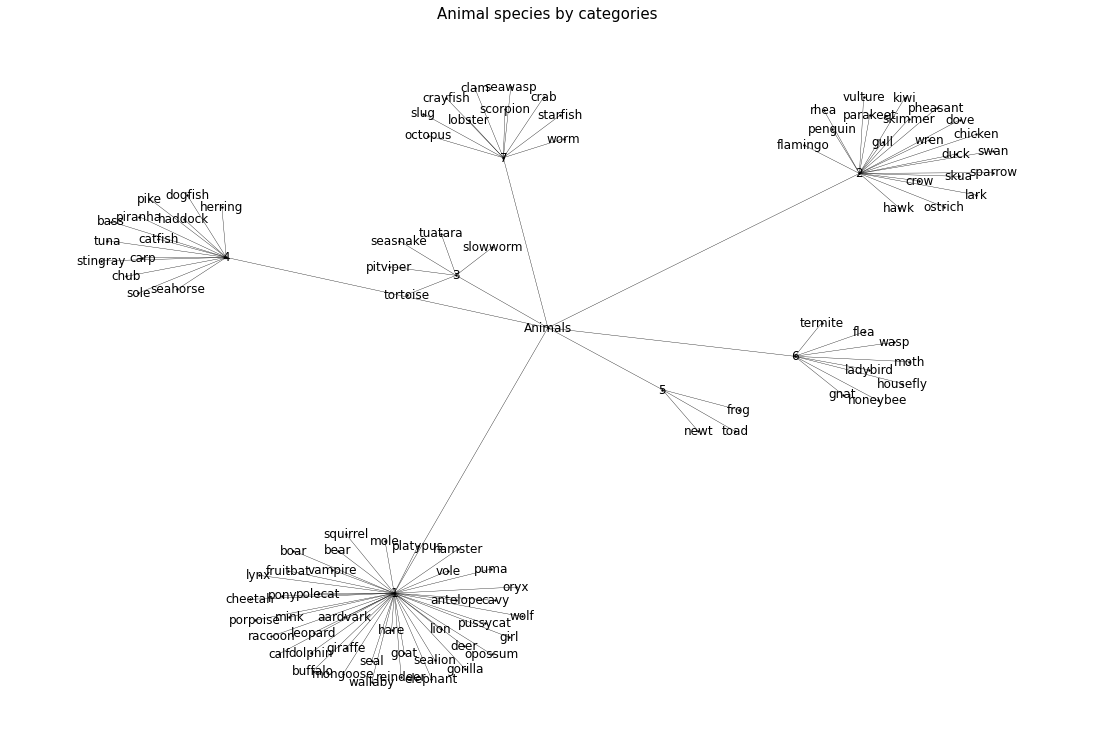

In [14]:
import networkx as nx
plt.figure(figsize=(15,10))
graph = nx.Graph()
# Creating root
graph.add_node("Animals")
# adding first node - (Animals > class number)
graph.add_nodes_from(category_animals)
# adding second node - (class number > animals)
graph.add_nodes_from(species)
# adding connections between nodes
graph.add_edges_from(edges_of_species)

options = {

    'node_color': 'black',
    'node_size': 1.8,
    'width': 0.35,

}

nx.draw(graph,with_labels = True,**options)
plt.title('Animal species by categories',size=15)
plt.show()

In [15]:
df_class = df_class.sort_values(by='Number_Of_Animal_Species_In_Class',ascending=False)

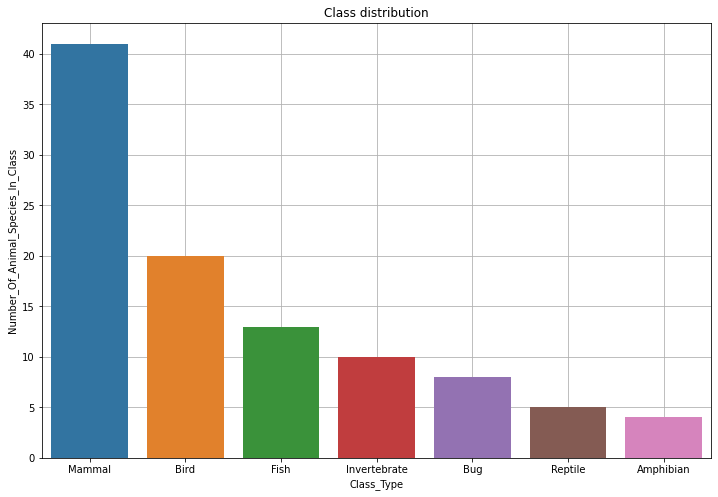

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_class, x='Class_Type',y='Number_Of_Animal_Species_In_Class',zorder=2)
plt.title('Class distribution')
ax.grid(zorder=0)
plt.show()

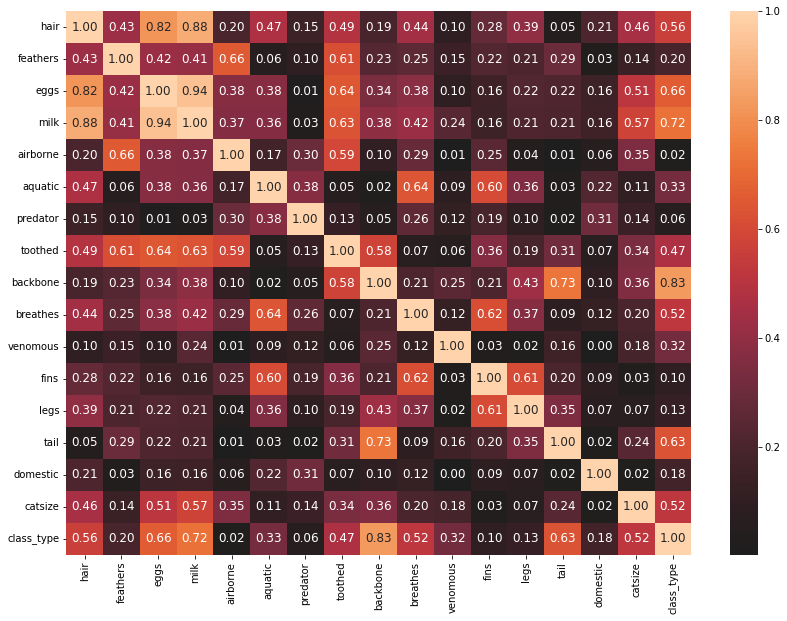

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(abs(df_zoo.corr()),annot=True,annot_kws={'size':12},fmt='.2f',center=0)
plt.show()

In [18]:
df_zoo = df_zoo.set_index(['animal_name'])
df_zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Model building

In [19]:
target = np.array(df_zoo.iloc[:,-1])
data = np.array(df_zoo.iloc[:,:-1])

In [20]:
data

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [21]:
target

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.30,stratify=target)

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

print('Score: ', knn.score(x_test,y_test))

prediction = knn.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

Score:  0.967741935483871


array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [25]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)

print('Score: ', dtc.score(x_test,y_test))

prediction = dtc.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

Score:  0.8387096774193549


array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [27]:
svc = SVC(gamma='auto')
svc.fit(x_train,y_train)

print('Score: ', svc.score(x_test,y_test))

prediction = svc.predict(X=x_test)
expected = y_test
confusion_matrix(y_true=expected, y_pred=prediction)

Score:  0.9032258064516129


array([[12,  0,  0,  1,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [29]:
df_class.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."


In [30]:
# data required to visualization of decision tree graph
class_names = list(np.arange(1,8,1))
df_class = df_class.sort_values(by='Class_Number')

In [31]:
class_names

[1, 2, 3, 4, 5, 6, 7]

In [32]:
# converting every class stored in int into string(class number + class name)
for i in range(len(class_names)):
    if class_names[i] == df_class.Class_Number[i]:
        class_names[i] = str(class_names[i]) + ' ' + df_class.Class_Type[i]

In [33]:
class_names

['1 Mammal',
 '2 Bird',
 '3 Reptile',
 '4 Fish',
 '5 Amphibian',
 '6 Bug',
 '7 Invertebrate']

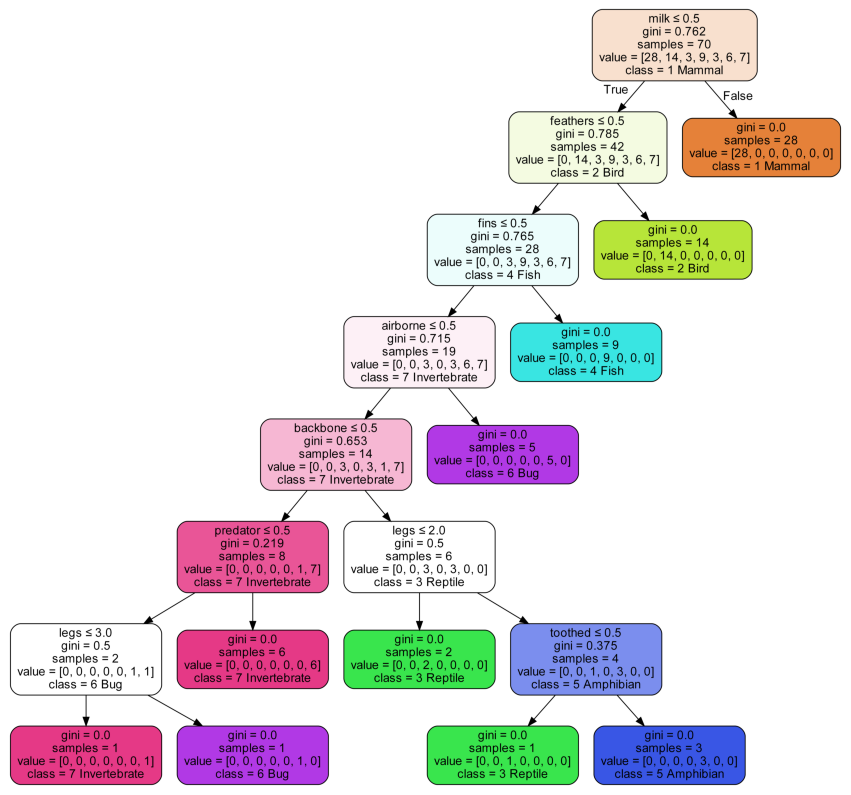

In [34]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

# Training model
dtc = DecisionTreeClassifier(max_depth=7,random_state=1000)
dtc.fit(x_train,y_train)

# creating graph
export_graphviz(dtc,
               out_file='dtc.dot',
               feature_names=df_zoo.iloc[:,:-1].columns,
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
# exporting graph to png
call(['dot', '-Tpng', 'dtc.dot', '-o', 'dtc.png', '-Gdpi=900'])

plt.figure(figsize=(15,18))
plt.imshow(plt.imread('dtc.png'))
plt.axis('off')
plt.show()

# Measurment

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Decision tree auc score
dtc_probs = dtc.predict_proba(x_test)
dtc_auc = roc_auc_score(y_test,dtc_probs,multi_class='ovr')
print('DT: ', dtc_auc)

DT:  0.9619047619047619


In [42]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(dtc,f)
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [43]:
df_zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [44]:
# Testing model on new species
crocodile =          np.array([0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1]).reshape(1,-1) # Reptile - 3
ampularie =          np.array([0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0]).reshape(1,-1) # Invertebrate - 7
shark =              np.array([0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1]).reshape(1,-1) # Fish - 4

In [45]:
df_class.filter(like='Class_')

,Class_Number,Class_Type
0,1,Mammal
1,2,Bird
2,3,Reptile
3,4,Fish
4,5,Amphibian
5,6,Bug
6,7,Invertebrate


In [46]:
print(mp.predict(crocodile))
print(mp.predict(ampularie))
print(mp.predict(shark))

[5]
[7]
[4]
